# Titanic ML project: 

1. Explore the data and get some general statistics, and visualise them. [Skip to Exploratory analysis](#Exploratory-Analysis)
2. Hypothesise about the data, verify correlations & find factors to build a model on. [Skip to Correlation verification](#Verify-the-correlation-with-Categorical-variables)
3. Work out a classification baseline for the models. [Skip to baseline determination](#Baseline-Accuracy-for-a-Classification-Model)
4. Visualise the success rate of the model iterations against the baselines. [Skip to Graphing model scores](#Graphing-out-iteration-scores)

## Exploratory Analysis

Some rough thoughts to answer: 
 1. What is the likelihood of survival in % in general. 
 2. Sex as correlated with survival.
 3. How does class correlate with survival chances.
 4. Age as correlated to survival. (bucket age?)
 5. Does where people embarked affect anything?  

 
And once we determine what could be correlational: 
- Verify the Correlation with Categorical Variables
- Exploratory Analysis Summary

In [21]:
#pip install tabulate

In [22]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import scipy.stats as stats
from matplotlib import pyplot as plt
from tabulate import tabulate

In [23]:
#df = pd.read_csv('data_sets/train.csv')
df = pd.read_csv('\\Users\\REDI.REDI-4042\\Downloads\\train.csv')

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# Data Dictionary -- Thisal
t_head = ['Variable', 'Definition', 'Key']
r_1 = ['survival','Survival','0 = No, 1 = Yes']
r_2 = ['pclass','Ticket class: A proxy for socio-economic status (SES)','1 = Upper, 2 = Middle, 3 = Lower']
r_3 = ['sex', 'Sex']
r_4 = ['Age', 'Age in years']
r_5 = ['sibsp','# of siblings / spouses aboard the Titanic']
r_6 = ['parch', '# of parents / children aboard the Titanic','Some children travelled only with a nanny, therefore parch=0 for them.']
r_7 = ['ticket', 'Ticket number']
r_8 = ['fare', 'Passenger fare']
r_9 = ['cabin', 'Cabin number']
r_10 = ['embarked','Port of Embarkation','C = Cherbourg, Q = Queenstown, S = Southampton']
table = [t_head, r_1,r_2, r_3, r_4, r_5, r_6, r_7, r_8, r_9, r_10]
print(tabulate(table, headers = "firstrow" ))

Variable    Definition                                             Key
----------  -----------------------------------------------------  ----------------------------------------------------------------------
survival    Survival                                               0 = No, 1 = Yes
pclass      Ticket class: A proxy for socio-economic status (SES)  1 = Upper, 2 = Middle, 3 = Lower
sex         Sex
Age         Age in years
sibsp       # of siblings / spouses aboard the Titanic
parch       # of parents / children aboard the Titanic             Some children travelled only with a nanny, therefore parch=0 for them.
ticket      Ticket number
fare        Passenger fare
cabin       Cabin number
embarked    Port of Embarkation                                    C = Cherbourg, Q = Queenstown, S = Southampton


In [26]:
# size of the data frame
df.shape  

(891, 12)

In [27]:
# Description of the types of data in the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
# Some descriptive statistics from the data frame
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

C:\Users\REDI.REDI-4042\AppData\Local\Temp\ipykernel_7312\990198679.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


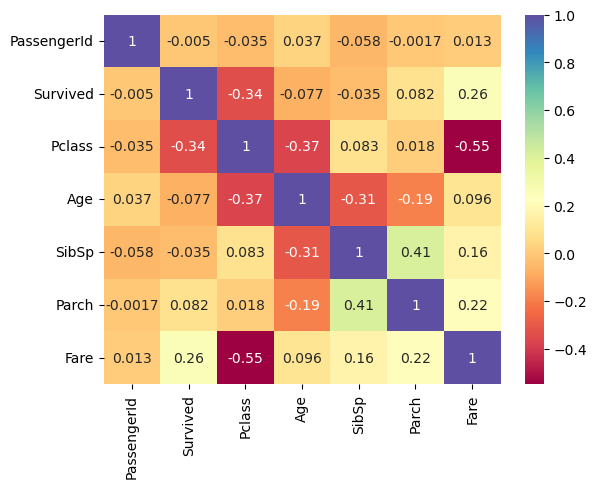

In [30]:
# Correlation matrix --Thisal
corr = df.corr()
sns.heatmap(corr, annot = True, cmap="Spectral")
plt.show()

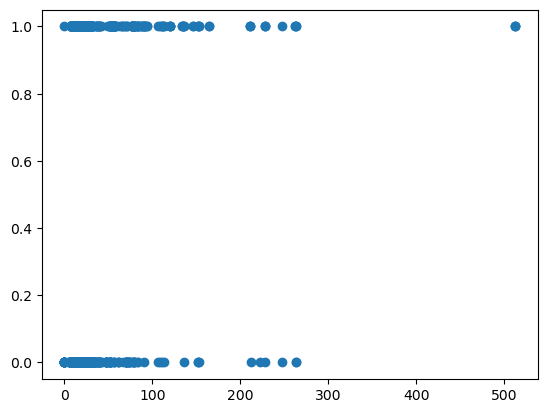

In [31]:
plt.scatter(df['Fare'],df['Survived'])

Generally by looking at the correlation coefficient none of the features depict any strong correlations. But for the survival it seems that for **Pclass** and **Fare** are mostly related with the **Survival rate** but in a negative manner.

In [54]:
#saving some variables for later use
total_passengers = df['PassengerId'].count()
survived_or_not = df.value_counts(['Survived'])
survived = survived_or_not[1]
died = survived_or_not[0]
survival_rate = (survived/total_passengers)
survival_rate_percent = ((survived/total_passengers) * 100).round(1)
death_rate = (died/total_passengers)
death_rate_percent = ((died/total_passengers) * 100).round(1) # rounding for ease of reading, don't do calculations though!
female_data = df[df['Sex'] == 'female']
male_data = df[df['Sex'] == 'male']
female_survival_rate = ((female_data['Survived'].sum() / len(female_data)) * 100).round(1)
male_survival_rate = ((male_data['Survived'].sum() / len(male_data)) * 100).round(1)

## #1. What is the likelihood of survival in general? 

In [58]:
print(f'The overall survival rate was {survival_rate_percent} %')
print(f'The overall death rate was {death_rate_percent} %')

print(f'The death rate and survival rate for baseline predictions is: Death rate: {death_rate}, Survival rate {survival_rate}')

The overall survival rate was 38.4 %
The overall death rate was 61.6 %
The death rate and survival rate for baseline predictions is: Death rate: 0.6161616161616161, Survival rate 0.3838383838383838


In [52]:
print(f'The male survival rate was {male_survival_rate} %')
print(f'The female survival rate was {female_survival_rate} %')

The male survival rate was 18.9 %
The female survival rate was 74.2 %


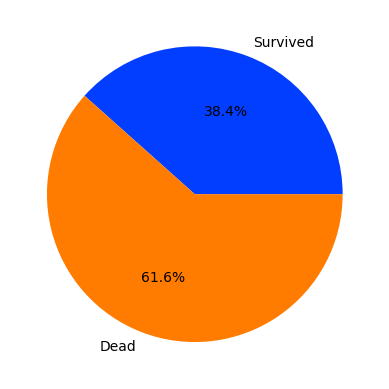

In [34]:
# Display the likelihood of survival in a pie chart
color = sns.color_palette('bright')[0:5]  #define Seaborn color palette to use
plt.pie([survival_rate, death_rate], labels = ['Survived', 'Dead'], colors = color, autopct ="%.1f%%")
plt.show()

## #2. What is the relationship between sex and survival rate? 

We already know that women were more likely to survive than men, but at what rate? 

In [35]:
groupby_sex = df.groupby(['Sex'])
#rough overview of the data so we can see how it should look
# normalise = True so we get percentages so it's easier to see if anything looks totally wrong
mfsurvival_rates = groupby_sex['Survived'].value_counts(normalize = True)
mfsurvival_rates

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

Text(0, 0.5, 'Survived')

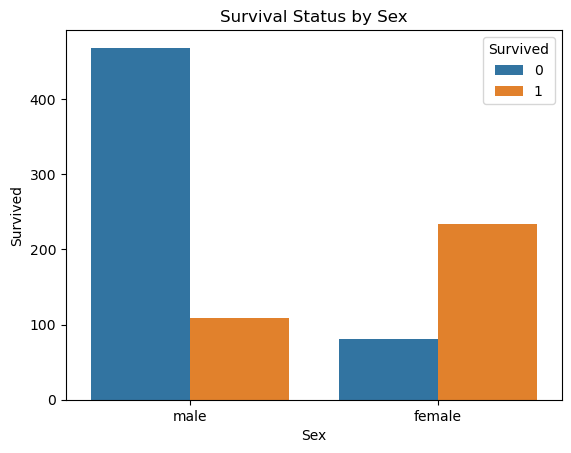

In [36]:
sns.countplot(data=df, x='Sex', hue='Survived')

# Set plot title and labels
plt.title('Survival Status by Sex')
plt.xlabel('Sex')
plt.ylabel('Survived')

## #3. How does passenger class correlate with survival rate? 

Think we can assume that first class folks are likely to do best, as is usually the way of the world. But by how much? 

<Axes: xlabel='Sex', ylabel='Survived'>

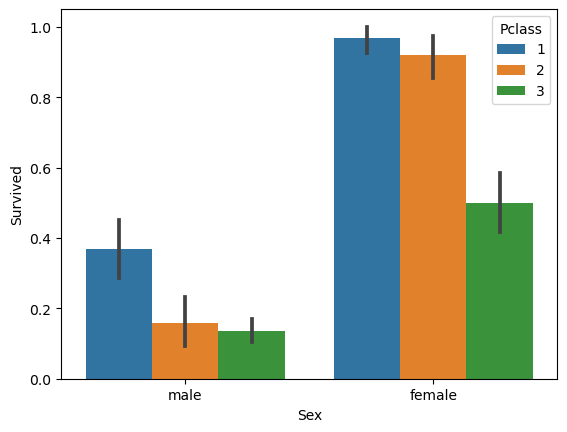

In [37]:
sns.barplot(data = df, x="Sex", y="Survived", hue ="Pclass")

I actually didn't expect it to be the case that even 3rd class women were better off than first class men in terms of survival rate. 

## 4. Any correlation between age and survival rate?

In [38]:
#Just out of interest- who is the oldest and youngest survivor? 
passengers_survived = df[df['Survived'] == 1]
oldest_age = passengers_survived['Age'].max()
print(oldest_age)
youngest_age = passengers_survived['Age'].min()
print(youngest_age)


80.0
0.42


In [39]:
oldest_row = df.loc[df['Age'].idxmax()]
youngest_row = df.loc[df['Age'].idxmin()]
oldest_survivor = (oldest_row['Name'])
youngest_survivor = (youngest_row['Name'])

print(f'The oldest survivor was called {oldest_survivor} and they were {oldest_age}.')
print(f'The youngest survivor was called {youngest_survivor} and they were {youngest_age}.')

The oldest survivor was called Barkworth, Mr. Algernon Henry Wilson and they were 80.0.
The youngest survivor was called Thomas, Master. Assad Alexander and they were 0.42.


<Axes: >

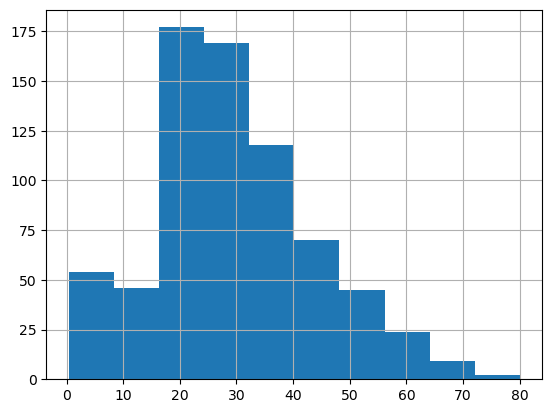

In [40]:
# Distribution of the age of the passengers
df['Age'].hist(bins = 10)

<Axes: >

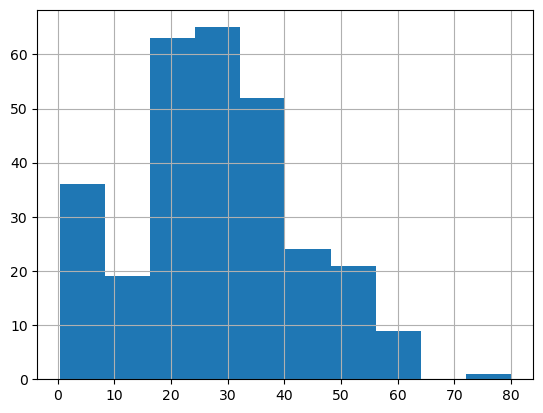

In [41]:
# Distribution of the age of the passengers that survived
passengers_survived['Age'].hist(bins = 10)

The distribution of the passengers present compared to the passengers that survived is quite similar, and there also seems to be a lot of null values, so I think this datapoint isn't particularly important.

## 5. Any correlation between where a passenger embarks and survival rate?

In [42]:
df.value_counts(['Embarked'])

#S = Southampton
#C = Cherbourg
#Q = Cobh (it was called Queenstown at the time, but they have now ditched the colonial name)

Embarked
S           644
C           168
Q            77
dtype: int64

Following graph is the survival rates based on only where folks embarked, disregarding all other factors. 

<Axes: xlabel='PassengerId', ylabel='Embarked'>

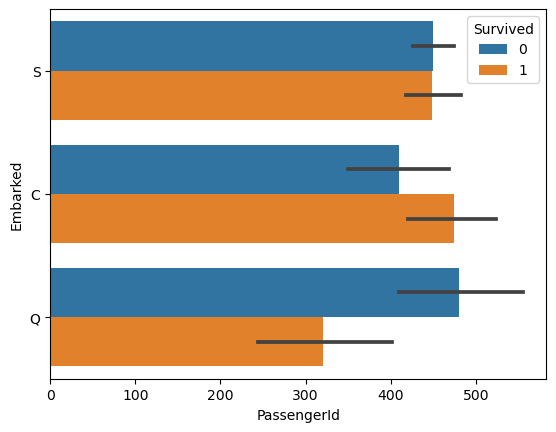

In [43]:
sns.barplot(data = df, x="PassengerId", y="Embarked", hue ="Survived")

It seems to indicate that getting on in Cobh gave you a statistically rather low chance of survival.

Let's take sex into account and see what difference it makes

<Axes: xlabel='Sex', ylabel='Survived'>

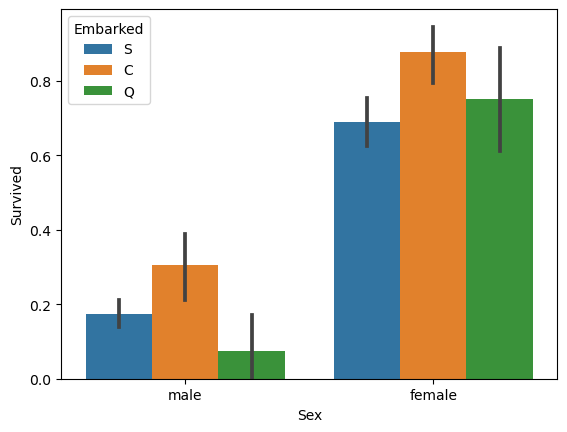

In [44]:
sns.barplot(data = df, x="Sex", y="Survived", hue ="Embarked")

Fellas that embarked in Ireland were significantly less likely to survive than a woman who embarked in France. They have statistically the largest chance of survival.

Out of interest, what is the sex breakdown of embarkation? Did a lot more men embark in Ireland? 

<Axes: xlabel='Embarked', ylabel='count'>

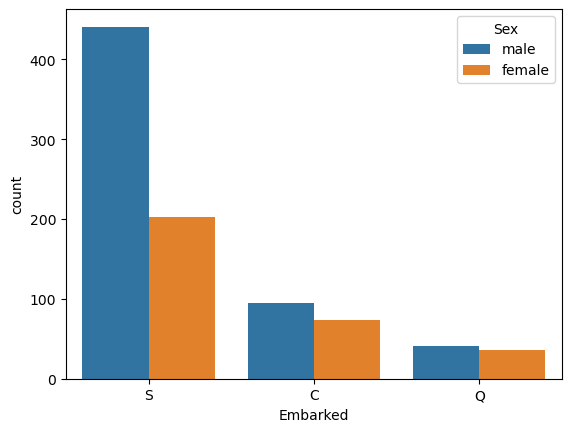

In [45]:
sns.countplot(data = df, x="Embarked", hue = 'Sex')

Damn, that's crazy. The difference between men and women embarking in Cobh is negligible, but the death rate is staggeringly different. Bad day to be an Irish fella. 
What proportion of those men that embarked at Cobh survived?

In [46]:
mf_groupby_embarked = df.groupby(['Embarked', 'Sex'])
cobh_survival_rates = mf_groupby_embarked['Survived'].value_counts(normalize = True)
cobh_survival_rates

Embarked  Sex     Survived
C         female  1           0.876712
                  0           0.123288
          male    0           0.694737
                  1           0.305263
Q         female  1           0.750000
                  0           0.250000
          male    0           0.926829
                  1           0.073171
S         female  1           0.689655
                  0           0.310345
          male    0           0.825397
                  1           0.174603
Name: Survived, dtype: float64

So the average survival rate was 38.4%. 
The survival rate of men embarking in Cobh was roughly only 7%, with over a 92% chance you weren't gonna make it.
The highest survival rate was women embarking in France at an 87% survival rate. 

##  Verify the correlation with Categorical variables

But to make sure the correlation between two categorical variables we have to perform Chi-square test between **Sex** and Survival and between **Embarked** and Survival

In [47]:
from scipy.stats import chisquare
from scipy.stats import chi2

In [48]:
cross_tab_sex = pd.crosstab(df['Sex'],df['Survived']) 
print(cross_tab_sex)

Survived    0    1
Sex               
female     81  233
male      468  109


In [49]:
# Test the relationship between two categorical variables using Chi-square test -- Thisal 
def chi_sqr_test(att_1, att_2):
    cross_tab_sex = pd.crosstab(df[att_1],df[att_2]) 
    # Observed values
    ob_val = cross_tab_sex.values
    # Expected values
    Chi_cont_val = stats.chi2_contingency(cross_tab_sex)
    ex_val = Chi_cont_val[3]

    no_of_rows = len(cross_tab_sex.iloc[0:2,0])
    no_of_columns = len(cross_tab_sex.iloc[0,0:2])
    
    # degree of freedom
    ddof = (no_of_rows-1)*(no_of_columns)  
    alpha = 0.05

    chi_square = sum([(o-e)**2./e for o,e in zip(ob_val,ex_val)])
    chi_square_statistic = chi_square[0]+chi_square[1]

    critical_value = chi2.ppf(q=1-alpha,df=ddof)
    p_value = 1-chi2.cdf(x=chi_square_statistic, df= ddof)
    
    if p_value <= alpha:
        print(f" There is a relationship with the two categorical variables {att_1} and {att_2}")
    else:
        print(f" There is a No relationship with the two categorical variables {att_1} and {att_2}")

In [50]:
# checking the relationship with the categorical attributes Sex and Survived
chi_sqr_test('Sex','Survived')

 There is a relationship with the two categorical variables Sex and Survived


In [51]:
# checking the relationship with the categorical attributes Embarked and Survived
chi_sqr_test('Embarked','Survived')

 There is a relationship with the two categorical variables Embarked and Survived


## Summary of the Analysis
* From numerical features **Pclass(-0.34)** and **Fare(0.26)** are more related to the survival 
* **Age** there does not seems to be having a considerable correlation with the survival.
* **Sex** and **Embarked** would be probabale categorical features for the model


## Baseline Accuracy for a Classification Model

We need a baseline. Why? 

We have an unbalanced data set: 
The **survival rate overall** according to the exploratory analysis was **38.4%**
The overall **death rate** was **61.6%** 

This means that if you predicted that everyone died, your accuracy rate would already be 61.6%.

We need to take this into account when checking accuracy. [Classifier for imbalanced data info here](https://towardsdatascience.com/calculating-a-baseline-accuracy-for-a-classification-model-a4b342ceb88f)

1. Method: Weighted guessing

First we can get a baseline for weighted guessing: 
The odds are 61/38 die/survive. 
If you imagine that you gues randomly with a 61/38 distribution what would your likely success rate be:

In [60]:
overall_survival_rate = 0.3838
overall_death_rate = 0.6161
#Odds of Guessing survived correctly: 
survival_guess_chance = overall_survival_rate * overall_survival_rate
print(f'The chance of guessing survival rate correctly is {survival_guess_chance}')
#Odds of Guessing died correctly: 
death_guess_chance = overall_death_rate * overall_death_rate
print(f'The chance of guessing death rate correctly is {death_guess_chance}')
baseline = overall_survival_rate**2 + overall_death_rate**2 
print(f'The baseline is {baseline}')

The chance of guessing survival rate correctly is 0.14730243999999998
The chance of guessing death rate correctly is 0.37957921
The baseline is 0.52688165


This means that with random weighted guessing we would still barely be better than 50%, with a 52% chance of getting it correct by randomly guessing based on the odds we can see from the overall death and survival rate. 

2. Method: Most frequent: Zero Rate Classifier

If the model just selects the most popular option - the death rate is 0.6161 - it will be correct at that rate. 
The baseline in this case would be 0.6161

Every model must be better then ZeroR to be useful at all. Therefore the new lowest acceptable baseline for any model created to be worthwhile is 61% accuracy.

## Graphing out iteration scores


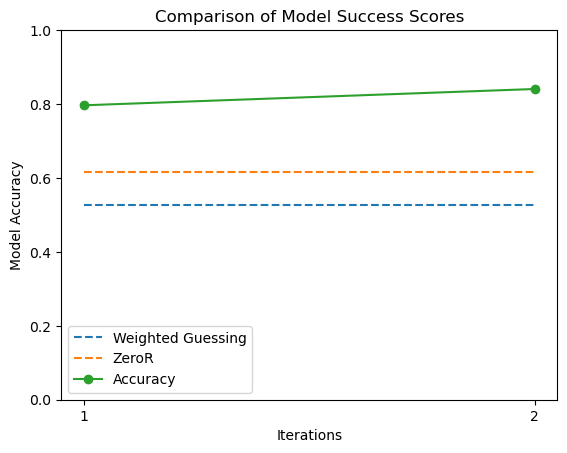

In [69]:
iterations = [1, 2]

baseline1_weighted_guessing = [0.52688165] * len(iterations)
baseline2_ZeroR =  [0.6161] * len(iterations) 
model_accuracy = [0.7966, 0.8407]  #Logistic_regression.ipynb, xgboost_classification.ipynb
# model_f1 = [0.7247, 0.8690]

iterations = [1, 2]

plt.plot(iterations, baseline1_weighted_guessing, label='Weighted Guessing', linestyle='--')
plt.plot(iterations, baseline2_ZeroR, label='ZeroR', linestyle='--')

plt.plot(iterations, model_accuracy, label='Accuracy', marker='o')
# plt.plot(iterations, model_scores, label='F1', marker='o')
# removed F1 score because it was so similar to accuracy that you couldn't see both lines. 

plt.title('Comparison of Model Success Scores')
plt.xlabel('Iterations')
plt.xticks(iterations)
plt.ylabel('Model Accuracy')
plt.ylim(0, 1) # can remove this, I just wanted to see it in the full 'percent' scope.
plt.legend()
plt.show()